In [1]:
import pandas as pd
import numpy as np
import locale
locale.setlocale(locale.LC_ALL, '')
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import re

plt.style.use('fivethirtyeight')

# 노트북 안에 그래프 그리기
%matplotlib inline
# 그래프 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False

# 컬럼을 다 보여주는 함수
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
Product = pd.read_csv('Pruduct.csv')
print("Product")
Search1 = pd.read_csv('Search1.csv')
print("Search1")
Search2 = pd.read_csv('Search2.csv')
print("Search2")
Custom = pd.read_csv('Custom.csv')
print("Custom")
Master = pd.read_csv('Master.csv')
print("Master")
Session = pd.read_csv('Session.csv')
print("Session")

Product
Search1
Search2
Custom
Master
Session


In [3]:
print('Product의 shape',Product.shape)
print("-----------------------------")
print('Search1의 shape',Search1.shape)
print("-----------------------------")
print('Search2의 shape',Search2.shape)
print("-----------------------------")
print('Custom의 shape',Custom.shape)
print("-----------------------------")
print('Master의 shape',Master.shape)
print("-----------------------------")
print('Session의 shape',Session.shape)

Product의 shape (5024906, 8)
-----------------------------
Search1의 shape (2884943, 4)
-----------------------------
Search2의 shape (8051172, 3)
-----------------------------
Custom의 shape (671679, 3)
-----------------------------
Master의 shape (847652, 5)
-----------------------------
Session의 shape (2712907, 9)


In [4]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024906 entries, 0 to 5024905
Data columns (total 8 columns):
CLNT_ID      int64
SESS_ID      int64
HITS_SEQ     int64
PD_C         int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM    object
PD_BUY_CT    object
dtypes: int64(4), object(4)
memory usage: 306.7+ MB


# 데이터 정제
- 테이블 병합 전 간단한 전처리 후 테이블 병합

# 1. Product

# 이상치 제거
- 공지사항에서 공지해준 이상치 제거
- HITS_SEQ == 1 은 이상치로서 제거 -> 공지가된 이상치

In [5]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024906 entries, 0 to 5024905
Data columns (total 8 columns):
CLNT_ID      int64
SESS_ID      int64
HITS_SEQ     int64
PD_C         int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM    object
PD_BUY_CT    object
dtypes: int64(4), object(4)
memory usage: 306.7+ MB


In [6]:
Product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5


In [7]:
Product.tail()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
5024901,4132078,10042817,76,527736,코드:s_kk_1205030|사이즈:BLACK 90 / 1개,아디다스(의류),"39,000",1
5024902,4133768,7272433,31,284643,색상:(42)블루|사이즈:55 / 1개,제이제이 지고트,"39,000",1
5024903,4133768,7946785,38,284643,색상:(60)아이보리|사이즈:55 / 1개,제이제이 지고트,"39,000",1
5024904,4134952,5355187,113,840639,사이즈:Medium / 1개,배럴,"39,000",1
5024905,4136808,8930953,33,442584,색상:1.블랙/사이즈:M,[언더아머(스포츠)],"39,000",1


In [8]:
Product.describe()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C
count,5.024906e+06,5.024906e+06,5.024906e+06,5.024906e+06
mean,3.324521e+06,5.837411e+06,8.125631e+01,4.634718e+05
std,1.915823e+06,3.100258e+06,8.593581e+01,2.436654e+05
min,8.000000e+00,2.600000e+01,1.000000e+00,1.000000e+00
25%,1.661354e+06,3.261247e+06,2.400000e+01,2.631752e+05
50%,3.326272e+06,6.046904e+06,5.000000e+01,4.740850e+05
75%,4.992865e+06,8.467387e+06,1.040000e+02,6.844500e+05
max,6.592554e+06,1.097794e+07,5.000000e+02,8.476520e+05


In [9]:
Product.isnull().sum()

CLNT_ID      0
SESS_ID      0
HITS_SEQ     0
PD_C         0
PD_ADD_NM    0
PD_BRA_NM    0
PD_BUY_AM    0
PD_BUY_CT    0
dtype: int64

### Product 테이블 탐색을 통해 알수 있는것
- 결측값은 존재하지않음
- HITS_SEQ는 최소값이 2, 최대값은 500,평균은 50 (최소값이 1인것은 분석에서 제외)
- PD_ADD_NM(상품추가정보)에는 색상, 사이즈, 수량 등등의 값들이 다양하게 들어가있음 분석에서 어떻게 사용할지 고민이 필요
- PD_BRA_NM(상품브랜드)에는 특수문자나 띄어쓰기가 존재함
- PD_BUY_AM는 숫자 정보이지만 , 때문에 object형임 변환이 필요
- PD_BUY_CT또한 object형이기 때문에 변환 필요

In [3]:
# 행동 한번으로 상품을 구매할 수 없다.
Product = Product[Product['HITS_SEQ'] != 1]

In [43]:
Product.head(30)

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5
5,4147643,4050743,66,149995,사이즈:옵션04.AN868_04 / 1개,앵글로매니아,"39,000",1
6,4147739,6881895,10,568751,신발색상:블랙(BK)/신발사이즈:280,[디스커버리],"39,000",1
7,4148106,6537318,21,570603,색상:BLK0_(BLK0)BLACK|사이즈:115 / 1개,데상트,"39,000",1
8,4148129,3942102,2,755148,모델명:올나이터 / 1개,어반디케이,"39,000",1
9,4148527,5718021,19,608620,사이즈:7 / 1개,나이키,"39,000",1


In [109]:
# PD_ADD_NM(추가정보) 열에서 | or / 로 세부정보를 구분
# |를 /로 변경하여 /로만 세부정보를 구분하게 하고 /로 세부정보를 분리하여 각각을 리스트로 저장
# 각 리스트 별로 양쪽에 공백자 제거
# 아직 사용 X ngram사용시 단어를 쪼개는데 어려움이 있음

# def changeText1(text):
#     return text.replace("|",' / ')

# def changeText2(text):
#     return text.split('/')

# def stripText(text):
#     a=[]
#     for i in range(len(text)):
#         a.append(text[i].strip())
#     return a

In [ ]:
# 이거하려면 색상 사이즈 등 추가 정보에대한 나눔이 필요
# 색상:로 split 사이즈: 로 split 근데 일정한 정보가 아님.....

In [110]:
# Product['PD_ADD_NM'] = Product['PD_ADD_NM'].apply(changeText1)
# Product['PD_ADD_NM'] = Product['PD_ADD_NM'].apply(changeText3)
# Product['PD_ADD_NM'] = Product['PD_ADD_NM'].apply(stripText)
# Product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,[색상:워터멜론],[바비브라운],"39,000",1
1,4140076,10189797,13,570603,"[색상:BLK0_(BLK0)BLACK , 사이즈:120 , 2개]",데상트,"39,000",2
2,4142395,6158159,85,179538,[(not set)],[아베다],"39,000",1
3,4144914,7935714,12,554336,"[색상:블랙 , 사이즈:160cm(12~13세) , 1개]",아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,[5개],데코르테,"39,000",5


In [4]:
Product.nunique()

CLNT_ID       922737
SESS_ID      2425886
HITS_SEQ         500
PD_C          847652
PD_ADD_NM     759548
PD_BRA_NM      22716
PD_BUY_AM      17731
PD_BUY_CT        361
dtype: int64

In [111]:
Product.shape

(5019730, 8)

In [4]:
def cleanText(data):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', data)
    return text

In [5]:
# 텍스트에 포함되어 있는 특수문자 제거

Product['PD_ADD_NM'] = Product['PD_ADD_NM'].apply(cleanText)
Product['PD_BRA_NM'] = Product['PD_BRA_NM'].apply(cleanText)
Product['PD_BUY_AM'] = Product['PD_BUY_AM'].apply(cleanText)

In [6]:
# PD_BUY_CT 의 1000이상의 값에서 , 발생
# 함수사용이 안됨 아마 , 가 있는데가 있고 없는데가 있어서..? 안되서 str로 강제변환후 , 를 공백으로 대체

Product["PD_BUY_CT"] = Product["PD_BUY_CT"].astype(str)
Product['PD_BUY_CT'] = Product['PD_BUY_CT'].str.replace(',','')

# int로 형변환
Product['PD_BUY_AM'] = Product['PD_BUY_AM'].astype(int)
Product['PD_BUY_CT'] = Product['PD_BUY_CT'].astype(int)

# 2. Session

In [14]:
Session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712907 entries, 0 to 2712906
Data columns (total 9 columns):
CLNT_ID            int64
SESS_ID            int64
SESS_SEQ           int64
SESS_DT            int64
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      object
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
dtypes: float64(1), int64(4), object(4)
memory usage: 186.3+ MB


In [15]:
Session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon
1,5873599,6616320,21,20180611,105.0,"1,604",mobile,Busan,Busan
2,5873599,5886172,40,20180624,41.0,632,mobile,Daejeon,Daejeon
3,5873884,1050889,15,20180913,160.0,"1,035",mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,20180412,13.0,298,mobile,Seoul,Seoul


In [16]:
Session.isnull().sum()

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

### 데이터 탐색을 통해 알 수 있는것
- SESS_DT는 월 / 일 / 요일로 분리가능
- TOT_PAG_VIEW_CT 와 TOT_SESS_HR_V 에는 nan값이 존재 테이블 병합 후 머신러닝을 통해 예측이 가능한지 확인
- TOT_SESS_HR_V에는 nan값 처리후 콤마 제거 작업필요

In [7]:
# int형인 SESS_DT를 datetime형태로 형변환

Session['SESS_DT'] = pd.to_datetime(Session['SESS_DT'],format="%Y%m%d")

In [8]:
# year는 2018로 동일하므로 월 / 일 / 요일 변수를 새롭게 만듬

Session['SESS_MONTH'] = Session['SESS_DT'].dt.month
Session['SESS_DAY'] = Session['SESS_DT'].dt.day
Session['SESS_WEEK'] = Session['SESS_DT'].dt.weekday

# 3. Search1

In [19]:
Search1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884943 entries, 0 to 2884942
Data columns (total 4 columns):
CLNT_ID       int64
SESS_ID       int64
KWD_NM        object
SEARCH_CNT    int64
dtypes: int64(3), object(1)
memory usage: 88.0+ MB


In [20]:
Search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


In [21]:
Search1.isnull().sum()

CLNT_ID       0
SESS_ID       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [22]:
Search2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051172 entries, 0 to 8051171
Data columns (total 3 columns):
SESS_DT       int64
KWD_NM        object
SEARCH_CNT    object
dtypes: int64(1), object(2)
memory usage: 184.3+ MB


In [23]:
Search2.isnull().sum()

SESS_DT       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [24]:
Custom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671679 entries, 0 to 671678
Data columns (total 3 columns):
CLNT_ID        671679 non-null int64
CLNT_GENDER    671679 non-null object
CLNT_AGE       671679 non-null int64
dtypes: int64(2), object(1)
memory usage: 15.4+ MB


In [25]:
Custom.isnull().sum()

CLNT_ID        0
CLNT_GENDER    0
CLNT_AGE       0
dtype: int64

In [26]:
Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847652 entries, 0 to 847651
Data columns (total 5 columns):
PD_C        847652 non-null int64
PD_NM       847652 non-null object
CLAC1_NM    847652 non-null object
CLAC2_NM    847652 non-null object
CLAC3_NM    847652 non-null object
dtypes: int64(1), object(4)
memory usage: 32.3+ MB


In [27]:
Master.isnull().sum()

PD_C        0
PD_NM       0
CLAC1_NM    0
CLAC2_NM    0
CLAC3_NM    0
dtype: int64

In [ ]:
########################

In [9]:
df_1 = pd.merge(Product,Master, on = ['PD_C'],how = 'left')

In [10]:
df_1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,4139680,7605037,12,642112,색상워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
1,4140076,10189797,13,570603,색상BLK0_BLK0BLACK사이즈120 2개,데상트,39000,2,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
2,4142395,6158159,85,179538,not set,아베다,39000,1,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트
3,4144914,7935714,12,554336,색상블랙사이즈160cm1213세 1개,아디다스 키즈,39000,1,YG GU 3/4 TGT.A(BQ2873) - 블랙 / 110cm(6세),유아동의류,여아의류하의,여아레깅스
4,4144917,6406509,78,190306,5개,데코르테,39000,5,(단독)허니듀 세트(+5만원 상당 샘플 증정),화장품/뷰티케어,스킨케어,스킨케어세트


In [11]:
df_1.shape

(5019730, 12)

In [12]:
df_2 = pd.merge(df_1,Search1,on=['CLNT_ID','SESS_ID'],how='left')

In [13]:
df_2.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,KWD_NM,SEARCH_CNT
0,4139680,7605037,12,642112,색상워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,NaN,NaN
1,4140076,10189797,13,570603,색상BLK0_BLK0BLACK사이즈120 2개,데상트,39000,2,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,NaN,NaN
2,4142395,6158159,85,179538,not set,아베다,39000,1,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트,입생로랑,3.0
3,4142395,6158159,85,179538,not set,아베다,39000,1,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트,이솝,3.0
4,4142395,6158159,85,179538,not set,아베다,39000,1,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트,아베다 스무드,1.0


In [14]:
df_2.tail()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,KWD_NM,SEARCH_CNT
9019474,4133768,7272433,31,284643,색상42블루사이즈55 1개,제이제이 지고트,39000,1,퍼프소매 주름 블라우스 (GH6A0BL80) - (60)아이보리 / 77,여성의류,여성의류상의,여성남방셔츠,NaN,NaN
9019475,4133768,7946785,38,284643,색상60아이보리사이즈55 1개,제이제이 지고트,39000,1,퍼프소매 주름 블라우스 (GH6A0BL80) - (60)아이보리 / 77,여성의류,여성의류상의,여성남방셔츠,NaN,NaN
9019476,4134952,5355187,113,840639,사이즈Medium 1개,배럴,39000,1,우먼 브라탑 래쉬가드 화이트 (BW5WBRT001WHSM) - XS,시즌스포츠,수영/물놀이,여성비치웨어,배럴,1.0
9019477,4134952,5355187,113,840639,사이즈Medium 1개,배럴,39000,1,우먼 브라탑 래쉬가드 화이트 (BW5WBRT001WHSM) - XS,시즌스포츠,수영/물놀이,여성비치웨어,배럴 여성,1.0
9019478,4136808,8930953,33,442584,색상1블랙사이즈M,언더아머스포츠,39000,1,언더아머 남성 반팔 카라티 4종 택1 - 1.블랙 / M,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,NaN,NaN


In [15]:
df_2.isnull().sum()

CLNT_ID             0
SESS_ID             0
HITS_SEQ            0
PD_C                0
PD_ADD_NM           0
PD_BRA_NM           0
PD_BUY_AM           0
PD_BUY_CT           0
PD_NM               0
CLAC1_NM            0
CLAC2_NM            0
CLAC3_NM            0
KWD_NM        2581190
SEARCH_CNT    2581190
dtype: int64

In [77]:
# 250만개의 null값 발생..
# Product 이미 구매가된 상품에 대한 테이블
# Search1 구매가 이루어졌지만 구매한것과 그냥검색마한 애들도 포함한 
# 병합후 Nan값이 떳다는건 Search1에는 없는데 Product에는 있다는 것
# 오류값일수 있지만 검색을 안하고 클릭으로만 구매가 되었다면 검색어가 없을 수 있을 듯

count    2.581190e+06
mean     4.743671e+01
std      5.177764e+01
min      2.000000e+00
25%      1.700000e+01
50%      3.100000e+01
75%      5.700000e+01
max      5.000000e+02
Name: HITS_SEQ, dtype: float64


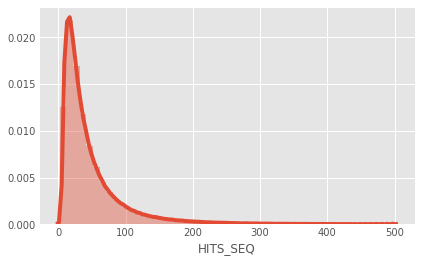

In [21]:
print(df_2[df_2['KWD_NM'].isnull()]['HITS_SEQ'].describe())
sns.distplot(df_2[df_2['KWD_NM'].isnull()]['HITS_SEQ'])
# 평균적으로 47번의 HITS_SEQ가 이루어짐 
# 최소값은 2개이지만 2번만으로 구매가 이루어질수있는지는 모르겠음
# 오류값이 아닌것을 확인하면 클릭으로 구매가 이루어진것을 나타내는 변수생성 가능할 듯

In [24]:
# Product에는 있지만 Search1에는 없는 데이터는 제거
# 추후에 다시 넣을 수도 있음

# df_2 = df_2[df_2['KWD_NM'].notnull()]

In [25]:
# df_2.isnull().sum()

In [ ]:
############################# 필요시 사용 ##############################
# 의미있는 명사 추출

In [25]:
from konlpy.tag import Twitter, Kkma, Hannanum
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
t = Twitter()
kkma = Kkma()
hannanum = Hannanum()

In [26]:
a = t.nouns(df_2['PD_BRA_NM'].iloc[16])
b = t.nouns(df_2['KWD_NM'].iloc[16])
print(a)
print(b)

['아레나']
['아레나', '남성', '수영복']


In [58]:
df_2['PD_BRA_NM'].nunique()
# 브랜드 이름 총 11748 개 사전에 등록하기
# 상품추가정보, 상품브랜드, 상품명, 상품 대/중/소 분류 값들에 대해서 검색어가 몇번 나왔는지
# => 정확하게 검색을 했는지 (고객들이 구매상품을 얼마나 명확히 하고 왔는지 알 수 있음)

11748

In [32]:
df_2.head(30)

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,KWD_NM,SEARCH_CNT
0,4139680,7605037,12,642112,색상워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,NaN,NaN
1,4140076,10189797,13,570603,색상BLK0_BLK0BLACK사이즈120 2개,데상트,39000,2,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,NaN,NaN
2,4142395,6158159,85,179538,not set,아베다,39000,1,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트,입생로랑,3.0
3,4142395,6158159,85,179538,not set,아베다,39000,1,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트,이솝,3.0
4,4142395,6158159,85,179538,not set,아베다,39000,1,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트,아베다 스무드,1.0
5,4142395,6158159,85,179538,not set,아베다,39000,1,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트,아베다,23.0
6,4144914,7935714,12,554336,색상블랙사이즈160cm1213세 1개,아디다스 키즈,39000,1,YG GU 3/4 TGT.A(BQ2873) - 블랙 / 110cm(6세),유아동의류,여아의류하의,여아레깅스,NaN,NaN
7,4144917,6406509,78,190306,5개,데코르테,39000,5,(단독)허니듀 세트(+5만원 상당 샘플 증정),화장품/뷰티케어,스킨케어,스킨케어세트,코스메 데코르테,8.0
8,4147643,4050743,66,149995,사이즈옵션04AN868_04 1개,앵글로매니아,39000,1,[ANGLOMANIA][5종택1] 명품 선글라스 5 - 옵션03.AN868_03,패션잡화,안경/선글라스,여성선글라스,선글라스,1.0
9,4147643,4050743,66,149995,사이즈옵션04AN868_04 1개,앵글로매니아,39000,1,[ANGLOMANIA][5종택1] 명품 선글라스 5 - 옵션03.AN868_03,패션잡화,안경/선글라스,여성선글라스,앵글로매니아,1.0


## 유사 문장 분석
- 텍스트 변수들만 추출하여 문장의 유사도분석
- 새로운 노트북에서 실행

In [22]:
exam = df_2[['CLNT_ID', 'SESS_ID', 'PD_ADD_NM', 'PD_BRA_NM',
        'PD_NM', 'CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM',
       'KWD_NM', 'SEARCH_CNT']]

In [116]:
# exam = exam[exam.notnull()].head(25)

In [26]:
exam.to_csv('exam.csv',index=False)

In [ ]:
#####################################################################

## 여기까지만 밑의 병합과정은 결정 X 
## 밑에는 정리 안함!

# 2. 데이터병합

## 2-1 Product와 Session 병합

In [28]:
df = pd.merge(Product,Session, on = ['CLNT_ID','SESS_ID'],how = 'left')

- 이상치를 제거한 Product 테이블과 Session 테이블 병합
- 병합 기준 테이블 Product 로 한 이유 : 상품 테이블에는 최근 6개월내 한번이라도 구매한 방문자의 정보 존재함 세션 테이블에도 존재하지만 접속일자, 총세션시간 같은 변수로 Product의 변수가 더 중요하다고 판단.
    

In [29]:
df.shape

(5019730, 18)

In [30]:
df.isnull().sum()

CLNT_ID                0
SESS_ID                0
HITS_SEQ               0
PD_C                   0
PD_ADD_NM              0
PD_BRA_NM              0
PD_BUY_AM              0
PD_BUY_CT              0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT        1
TOT_SESS_HR_V      17096
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
SESS_MONTH             0
SESS_DAY               0
SESS_WEEK              0
dtype: int64

- 위 결측값들은 Session 테이블에 있던 결측값

## 2.2 Custom과 병합

In [29]:
df = pd.merge(df,Custom, on = ['CLNT_ID'], how = 'left')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5019730 entries, 0 to 5019729
Data columns (total 20 columns):
CLNT_ID            int64
SESS_ID            int64
HITS_SEQ           int64
PD_C               int64
PD_ADD_NM          object
PD_BRA_NM          object
PD_BUY_AM          int32
PD_BUY_CT          int32
SESS_SEQ           int64
SESS_DT            datetime64[ns]
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      object
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
SESS_MONTH         int64
SESS_DAY           int64
SESS_WEEK          int64
CLNT_GENDER        object
CLNT_AGE           float64
dtypes: datetime64[ns](1), float64(2), int32(2), int64(8), object(7)
memory usage: 766.0+ MB


In [33]:
df.isnull().sum()

CLNT_ID                  0
SESS_ID                  0
HITS_SEQ                 0
PD_C                     0
PD_ADD_NM                0
PD_BRA_NM                0
PD_BUY_AM                0
PD_BUY_CT                0
SESS_SEQ                 0
SESS_DT                  0
TOT_PAG_VIEW_CT          1
TOT_SESS_HR_V        17096
DVC_CTG_NM               0
ZON_NM                   0
CITY_NM                  0
SESS_MONTH               0
SESS_DAY                 0
SESS_WEEK                0
CLNT_GENDER        1035893
CLNT_AGE           1035893
dtype: int64

## 2-3 Master 와 병합

In [30]:
df = pd.merge(df, Master, on = ['PD_C'], how = 'left')

In [35]:
df.isnull().sum()

CLNT_ID                  0
SESS_ID                  0
HITS_SEQ                 0
PD_C                     0
PD_ADD_NM                0
PD_BRA_NM                0
PD_BUY_AM                0
PD_BUY_CT                0
SESS_SEQ                 0
SESS_DT                  0
TOT_PAG_VIEW_CT          1
TOT_SESS_HR_V        17096
DVC_CTG_NM               0
ZON_NM                   0
CITY_NM                  0
SESS_MONTH               0
SESS_DAY                 0
SESS_WEEK                0
CLNT_GENDER        1035893
CLNT_AGE           1035893
PD_NM                    0
CLAC1_NM                 0
CLAC2_NM                 0
CLAC3_NM                 0
dtype: int64

In [36]:
df.shape

(5019730, 24)

## 2.4 Search1과 병합

In [37]:
df = pd.merge(df,Search1,on=['CLNT_ID','SESS_ID'],how='left')

In [38]:
df.shape

(9019479, 26)

In [39]:
df.isnull().sum()

CLNT_ID                  0
SESS_ID                  0
HITS_SEQ                 0
PD_C                     0
PD_ADD_NM                0
PD_BRA_NM                0
PD_BUY_AM                0
PD_BUY_CT                0
SESS_SEQ                 0
SESS_DT                  0
TOT_PAG_VIEW_CT          1
TOT_SESS_HR_V        17096
DVC_CTG_NM               0
ZON_NM                   0
CITY_NM                  0
SESS_MONTH               0
SESS_DAY                 0
SESS_WEEK                0
CLNT_GENDER        2078942
CLNT_AGE           2078942
PD_NM                    0
CLAC1_NM                 0
CLAC2_NM                 0
CLAC3_NM                 0
KWD_NM             2581190
SEARCH_CNT         2581190
dtype: int64

In [40]:
display(df.head())

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,SESS_MONTH,SESS_DAY,SESS_WEEK,CLNT_GENDER,CLNT_AGE,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,KWD_NM,SEARCH_CNT
0,4139680,7605037,12,642112,색상워터멜론,바비브라운,39000,1,1,2018-05-26,21.0,902,desktop,Seoul,Seoul,5,26,5,NaN,NaN,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,NaN,NaN
1,4140076,10189797,13,570603,색상BLK0_BLK0BLACK사이즈120 2개,데상트,39000,2,172,2018-04-13,18.0,113,mobile,Gyeonggi-do,Icheon-si,4,13,4,F,40.0,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,NaN,NaN
2,4142395,6158159,85,179538,not set,아베다,39000,1,1,2018-06-19,107.0,"6,524",desktop,Seoul,Seoul,6,19,1,NaN,NaN,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트,입생로랑,3.0
3,4142395,6158159,85,179538,not set,아베다,39000,1,1,2018-06-19,107.0,"6,524",desktop,Seoul,Seoul,6,19,1,NaN,NaN,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트,이솝,3.0
4,4142395,6158159,85,179538,not set,아베다,39000,1,1,2018-06-19,107.0,"6,524",desktop,Seoul,Seoul,6,19,1,NaN,NaN,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트,아베다 스무드,1.0


In [41]:
display(df.tail())

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,SESS_MONTH,SESS_DAY,SESS_WEEK,CLNT_GENDER,CLNT_AGE,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,KWD_NM,SEARCH_CNT
9019474,4133768,7272433,31,284643,색상42블루사이즈55 1개,제이제이 지고트,39000,1,208,2018-06-01,37.0,349,mobile,Seoul,Seoul,6,1,4,F,30.0,퍼프소매 주름 블라우스 (GH6A0BL80) - (60)아이보리 / 77,여성의류,여성의류상의,여성남방셔츠,NaN,NaN
9019475,4133768,7946785,38,284643,색상60아이보리사이즈55 1개,제이제이 지고트,39000,1,182,2018-05-21,37.0,333,mobile,Seoul,Seoul,5,21,0,F,30.0,퍼프소매 주름 블라우스 (GH6A0BL80) - (60)아이보리 / 77,여성의류,여성의류상의,여성남방셔츠,NaN,NaN
9019476,4134952,5355187,113,840639,사이즈Medium 1개,배럴,39000,1,80,2018-07-02,112.0,856,mobile,Jeollanam-do,Yeosu-si,7,2,0,F,30.0,우먼 브라탑 래쉬가드 화이트 (BW5WBRT001WHSM) - XS,시즌스포츠,수영/물놀이,여성비치웨어,배럴,1.0
9019477,4134952,5355187,113,840639,사이즈Medium 1개,배럴,39000,1,80,2018-07-02,112.0,856,mobile,Jeollanam-do,Yeosu-si,7,2,0,F,30.0,우먼 브라탑 래쉬가드 화이트 (BW5WBRT001WHSM) - XS,시즌스포츠,수영/물놀이,여성비치웨어,배럴 여성,1.0
9019478,4136808,8930953,33,442584,색상1블랙사이즈M,언더아머스포츠,39000,1,2,2018-05-04,33.0,"1,190",desktop,Seoul,Seoul,5,4,4,NaN,NaN,언더아머 남성 반팔 카라티 4종 택1 - 1.블랙 / M,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,NaN,NaN


In [42]:
print('########## 최종 shape : ',df.shape,"##########")

########## 최종 shape :  (9019479, 26) ##########


In [43]:
df.to_csv("df.csv",index=False)

KeyboardInterrupt: 